## Código del proyecto


## 1. ELEGIR TEMÁTICA

La temática estará relacionada con las platas solares fotovoltaicas en Europa.
Me gustaría conocer si los países europeos que apuestan por está energía renovable es únicamente por la irradiancia solar que reciben o si hay algún parámetro más que afecte.


## 2. OBTENCIÓN DE DATOS

He buscado en las siguientes plataformas que datos hay disponibles para Europa:

-	https://datacommons.org/

	Población total, Esperanza de vida, Personas desempleadas, Nivel de educación, Generación anual de energía solar, Capacidad instalada de energía solar, Flujo financiero de apoyo a la energía solar, Precipitación media, Superficie país
-	https://datacatalog.worldbank.org

	Irradiancia solar, Desarrollo humano, PIB, Consumo energía, Coste de construcción

	
En líneas generales, los datos estaban aceptables y manejables a excepción de la precipitación media. Estos datos han tenido que ser buscados en reiteradas ocasiones puesto que no eran representativos. 
Con el resto de los datos no se han necesitado hacer más búsquedas.


## 3. DEFINICIÓN DE HIPÓTESIS

Las plantas fotovoltaicas...
-	¿Dependen exclusivamente de la irradiación horizontal global (GHI)?
-	¿Qué características tiene un país europeo que apuesta por la energía solar fotovoltaica?
-	¿Dependerá del tipo de población?
    	Habitantes / km2, Desarrollo humano, Consumo energético medio
-	¿Dependerá del clima?
    	Precipitaciones medias
-	¿Dependerá de la superficie del país?
        Superficie km2
-	¿Dependerá de parámetros económicos?
        PIB, Coste de construcción


## 4. PROCESADO DE DATOS

Importamos bibliotecas

In [2853]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Cargamos archivos e informacion, en el proyecto del EDA ya limpiamos los datos. Solo nos quedamos con los paises Europeos.

In [2854]:

# Ruta info de irradiancia
file_path = "./src/data/solargis_pvpotential_countryranking_2020_data.xlsx"
df_ = pd.read_excel(file_path,sheet_name="Country indicators", header=1)

In [2855]:
df_.head(2)

,ISO_A3,Country or region,Note,World Bank \nRegion,"Total population, 2018","Total area, 2018",Evaluated area,Level 1 area \n(% of evaluated area),"Human development \nIndex, 2017","Gross domestic product (USD per capita), 2018",...,"Average practical potential \n(PVOUT Level 1, \nkWh/kWp/day), long-term","Average economic potential (LCOE, USD/kWh), 2018","Average PV \nseasonality index, long-term","PV equivalent area (% of total area), long-term","Cummulative installed PV capacity (MWp), 2018","Cummulative installed PV capacity (Wp per capita), 2018","Access to electricity\n(% of rural population), 2016","Electric power consumption (kWh per capita), 2014","Reliability of supply and transparency of tariff index, 2019","Approximate electricity \nTariffs for SMEs \n(US cent/kWh), 2019"
0,ABW,Aruba (Neth.),NaN,Other,105845,180.0,180,0.847926,NaN,25630.266492,...,4.9646,0.0853,1.1803,NaN,6.1,57.631442,92.452844,NaN,NaN,NaN
1,AFG,Afghanistan,NaN,SOA,37172386,652860.0,652860,0.587350,0.497695,520.896603,...,5.0159,0.0851,1.6665,NaN,22.0,0.591837,78.961074,NaN,0.0,17.6


In [2856]:
df_.columns
columna_deseada= [  "Country or region",
                    'Total population, 2018',
                    'Human development \nIndex, 2017',
                    'Gross domestic product (USD per capita), 2018',
                    'Average theoretical potential (GHI, kWh/m2/day), \nlong-term',
                    'Average economic potential (LCOE, USD/kWh), 2018',
                    'Cummulative installed PV capacity (MWp), 2018', 
                    'Electric power consumption (kWh per capita), 2014',
                    'Approximate electricity \nTariffs for SMEs \n(US cent/kWh), 2019']

In [2857]:
df_global_en = df_[columna_deseada]
df_global_en

,Country or region,"Total population, 2018","Human development \nIndex, 2017","Gross domestic product (USD per capita), 2018","Average theoretical potential (GHI, kWh/m2/day), \nlong-term","Average economic potential (LCOE, USD/kWh), 2018","Cummulative installed PV capacity (MWp), 2018","Electric power consumption (kWh per capita), 2014","Approximate electricity \nTariffs for SMEs \n(US cent/kWh), 2019"
0,Aruba (Neth.),105845,NaN,25630.266492,6.1098,0.0853,6.1,NaN,NaN
1,Afghanistan,37172386,0.497695,520.896603,5.4904,0.0851,22.0,NaN,17.6
2,Angola,30809762,0.581179,3432.385736,5.7467,0.0919,13.4,312.228825,4.6
3,Albania,2866376,0.784911,5253.630064,4.1954,0.1051,1.0,2309.366503,8.7
4,Andorra,77006,0.857684,42029.762737,4.0490,0.0986,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
204,Kosovo,1845300,NaN,4281.292329,3.8542,0.1150,NaN,NaN,NaN
205,Republic of Yemen,28498687,0.451900,944.408499,6.4675,0.0818,150.0,219.799922,NaN
206,South Africa,57779622,0.699030,6374.015446,5.6293,0.1146,2558.8,4197.907047,14.8
207,Zambia,17351822,0.588083,1539.900158,5.8834,0.0880,5.0,717.349168,4.7


In [2858]:
renombrar = { "Country or region": "pais",
             'Total population, 2018' : "poblacion",
              'Human development \nIndex, 2017': "desarrollo_humano_porcentaje",
              'Gross domestic product (USD per capita), 2018': "pib_usd_per_capita",
              'Average theoretical potential (GHI, kWh/m2/day), \nlong-term' : "irradiancia_kwh/m2/day",
              'Average economic potential (LCOE, USD/kWh), 2018': "coste_construccion_usd/kwh",
              'Cummulative installed PV capacity (MWp), 2018': "capacidad_instalada_mwp", 
              'Electric power consumption (kWh per capita), 2014': "consumo_kwh_per_capita",
              'Approximate electricity \nTariffs for SMEs \n(US cent/kWh), 2019': "tarifa_luz_uscent/kwh" }
df_global = df_global_en.rename(columns= renombrar)

In [2859]:
df_global.set_index("pais", inplace=True)

In [2860]:
df_global["capacidad_instalada_wp_per_capita"] = df_global["capacidad_instalada_mwp"]*1000000/ df_global["poblacion"]
df_global.drop(columns = ["capacidad_instalada_mwp", "poblacion"], inplace=True)

In [2861]:

# Comprobar si hay valores nulos en y_train
print("Valores nulos en y_train:", df_global["capacidad_instalada_wp_per_capita"].isnull().sum())

Valores nulos en y_train: 6


In [2862]:
df_global.dropna(subset=["capacidad_instalada_wp_per_capita"], inplace= True)

print("Valores nulos en y_train:", df_global["capacidad_instalada_wp_per_capita"].isnull().sum())

Valores nulos en y_train: 0


## 5. TRAIN / TEST

In [2863]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
train_set, test_set = train_test_split(df_global, test_size= 0.2, random_state= 42)

In [2864]:
#Definimos el target y features
target = "capacidad_instalada_wp_per_capita"
features = [col for col in train_set.columns if col != target]

X_train = train_set[features]
y_train = train_set[target]

X_test = test_set[features]
y_test = test_set[target]

## 6. EXPLORATORIO Y VISUALIZACIÓN

In [2865]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, Samoa to Liberia
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   desarrollo_humano_porcentaje       147 non-null    float64
 1   pib_usd_per_capita                 154 non-null    float64
 2   irradiancia_kwh/m2/day             162 non-null    float64
 3   coste_construccion_usd/kwh         162 non-null    float64
 4   consumo_kwh_per_capita             111 non-null    float64
 5   tarifa_luz_uscent/kwh              143 non-null    float64
 6   capacidad_instalada_wp_per_capita  162 non-null    float64
dtypes: float64(7)
memory usage: 10.1+ KB


In [2866]:
train_set.describe() #Datos no estandarizados

,desarrollo_humano_porcentaje,pib_usd_per_capita,irradiancia_kwh/m2/day,coste_construccion_usd/kwh,consumo_kwh_per_capita,tarifa_luz_uscent/kwh,capacidad_instalada_wp_per_capita
count,147.000000,154.000000,162.000000,162.000000,111.000000,143.000000,162.000000
mean,0.718591,17206.239445,4.808498,0.101836,4093.471243,15.775524,45.759558
std,0.151005,23750.591890,0.970068,0.019429,4355.121896,9.710791,88.632067
min,0.353931,275.429603,2.583300,0.067300,39.055805,0.800000,0.000000
25%,0.596567,2074.402645,4.143725,0.089800,1012.525022,9.700000,0.645328
50%,0.749773,7133.368934,5.045300,0.099300,2619.960616,13.500000,7.380572
75%,0.846611,23842.850750,5.562750,0.109150,5971.035736,19.350000,50.115507
max,0.952522,165028.245029,6.467500,0.232200,22999.934595,67.400000,553.854467


Análisis exploratorio

Visualización de variables

Voy a dejar las variables con un # para que no se haga tan extenso el notebook, en el notebook codigo podeis encontrarlo

1 variable - Histograma y función densidad

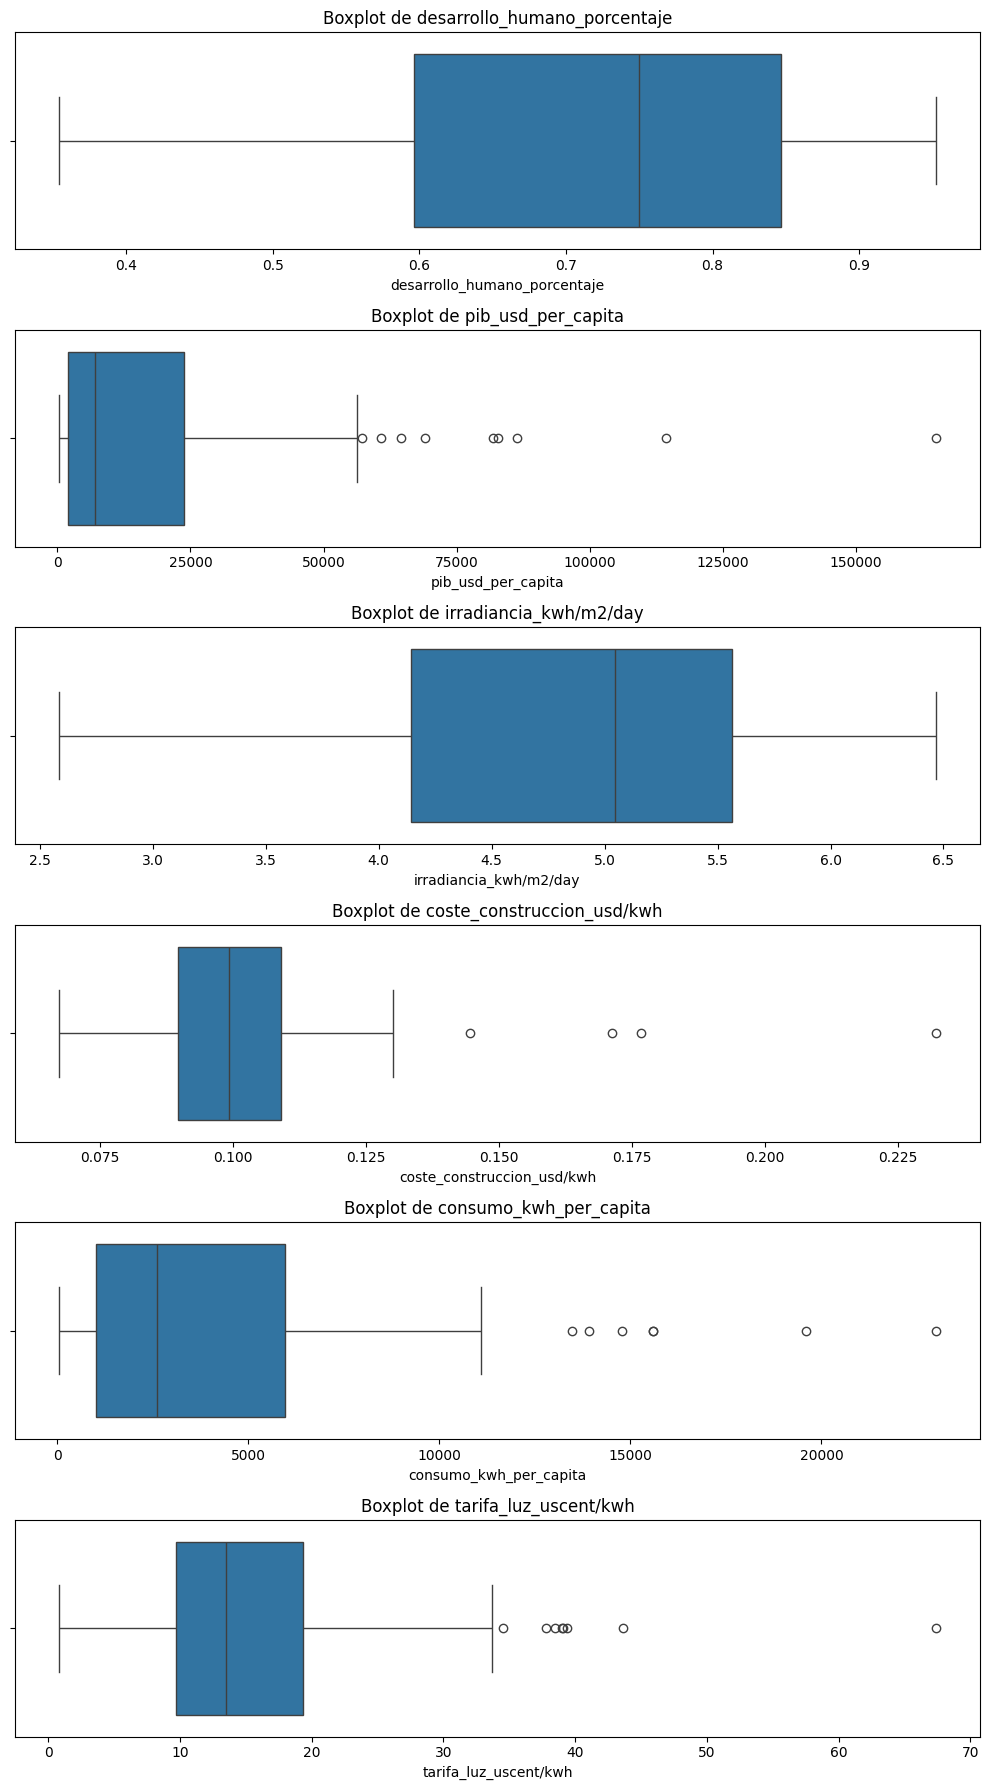

In [2867]:
plt.figure(figsize=(10, len(X_train.columns) * 3))

for i, column in enumerate(X_train.columns):
    plt.subplot(len(X_train.columns), 1, i + 1)  # Subplot dinámico
    sns.boxplot(x=X_train[column])
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
    plt.tight_layout()

plt.show()

In [2868]:
def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

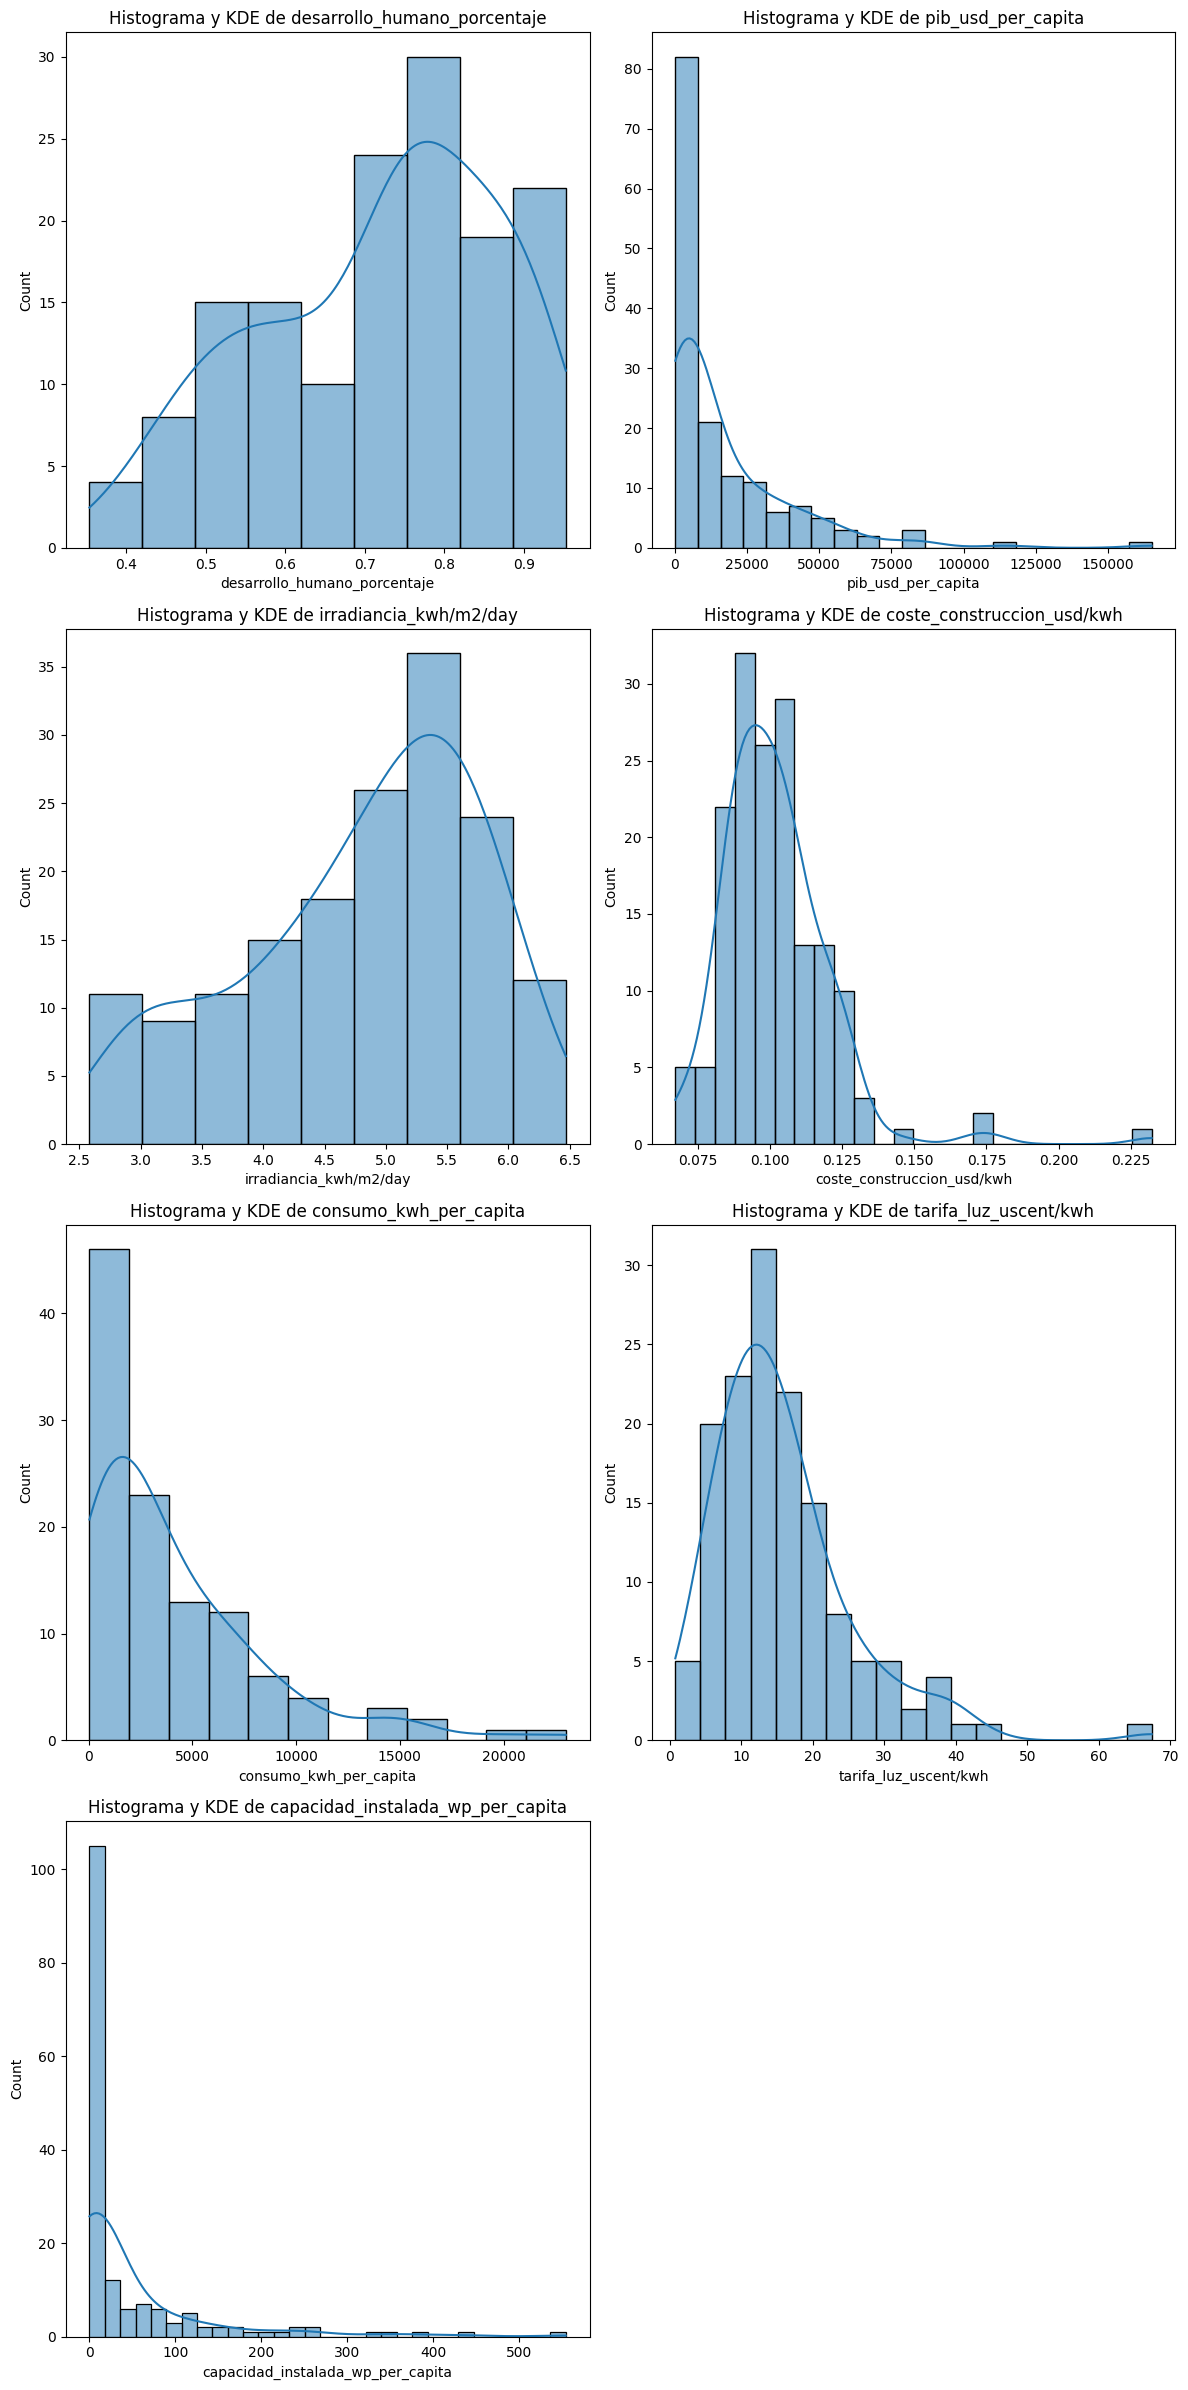

In [2869]:
#Vemos todos los histogramas de df_eu_final
plot_histo_dens(train_set, train_set.columns)

In [2870]:
#Vemos que tenemos desbalanceado el target. 

1 variable - Tratar las variables numericas como si fueran categoricas

In [2871]:
#Función para Graficas de distribución categoricas 
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


Matriz de correlación

C:\Users\USER\AppData\Local\Temp\ipykernel_14440\2143004341.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)


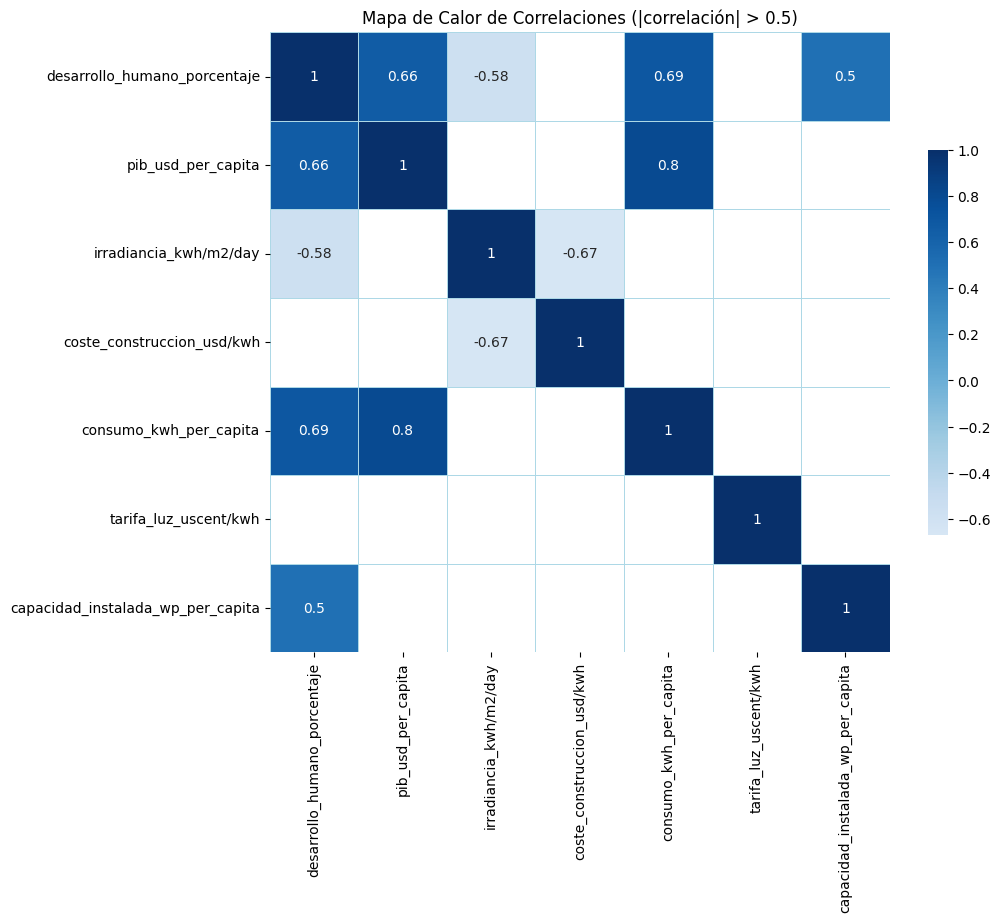

In [2872]:
#Ver matriz de correlaciones solo valores más representativos
def mapa_calor_correlacion( df,porcentaje):
    # Supongamos que df_eu es tu DataFrame y ya has calculado la matriz de correlación
    matriz_correlacion = df.corr()

    # Filtrar la matriz de correlación para dejar solo valores superiores a 0.5 o inferiores a -0.5
    filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)

    # Crear el mapa de calor
    plt.figure(figsize=(10, 10))
    sns.heatmap(filtro_correlacion,
                square=True, 
                annot=True, 
                cmap='Blues', 
                center=0,
                cbar_kws={'shrink': .5},
                linewidths=.5,
                linecolor='lightblue')

    plt.title(f'Mapa de Calor de Correlaciones (|correlación| > {porcentaje})')
    return plt.show()


mapa_calor_correlacion(train_set, 0.5)
#Esta imagen, ira a la presentación

3 variables - Gráficos de dispersion

In [2873]:
#Funcion para grafico de dispersión con 3 variables y todos los parametros
def dispersion_3_var(df,x1, z1):
    num_graphs = len(df.columns)
    for y1 in df.columns:
        plt.figure()  # Crea una nueva figura
        sns.scatterplot(x=x1,
                        y=y1,
                        size=df[z1],
                        hue=df[z1],
                        palette= "Blues",
                        data=df,
                        edgecolor='grey',
                        legend=False)  # Esto quita la leyenda)
    # Mostrar todas las gráficas
    return plt.show()

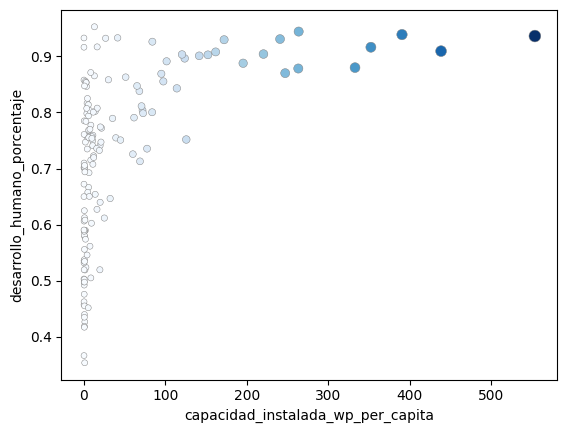

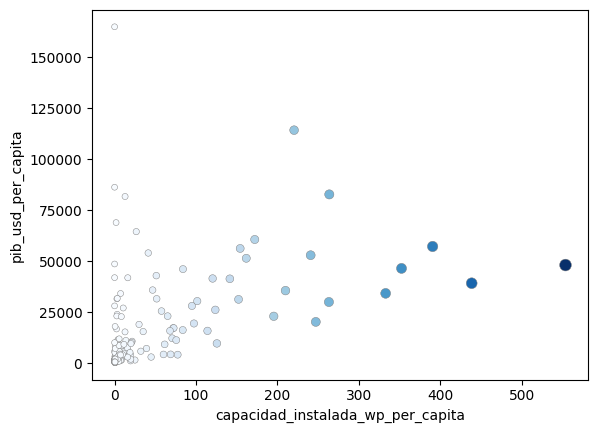

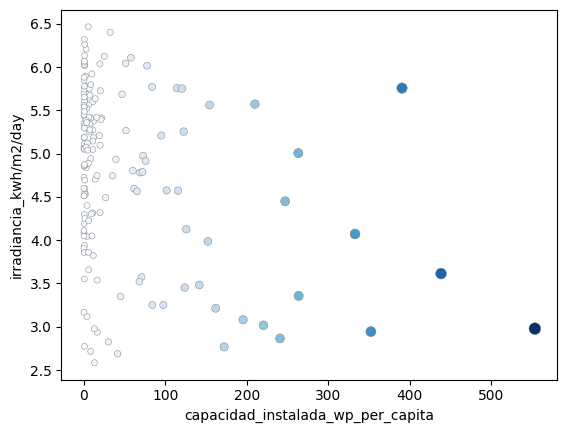

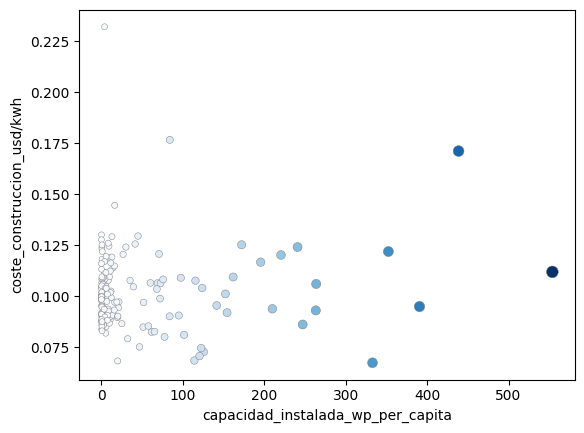

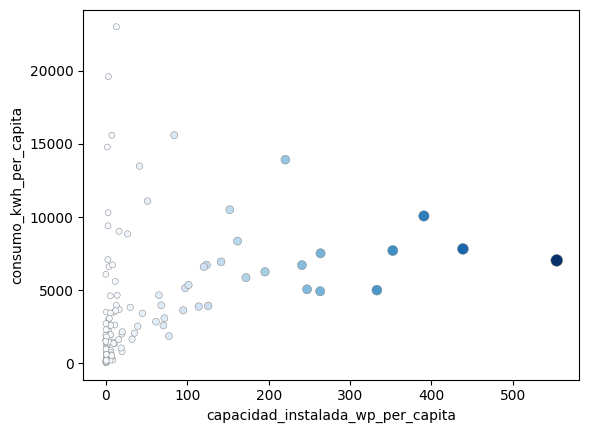

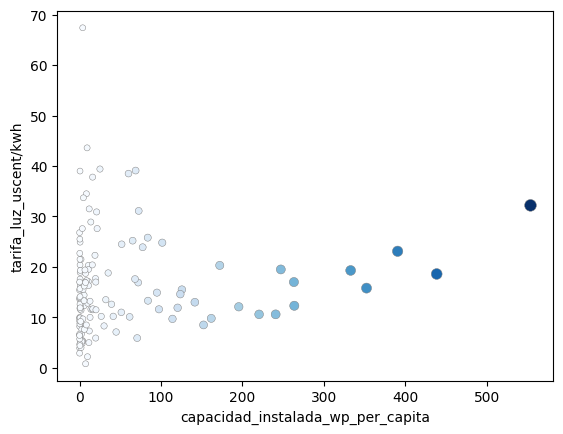

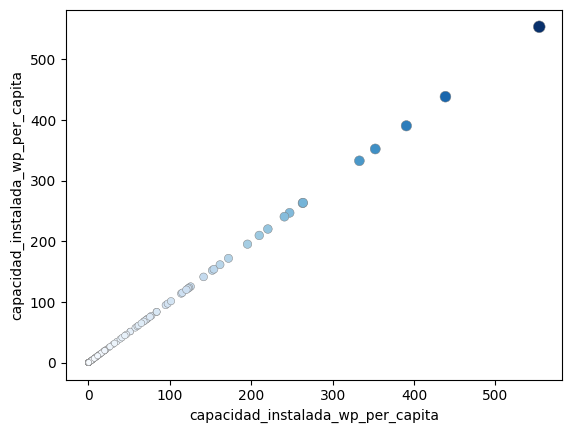

In [2874]:
#VARIABLE CAPACIDAD INSTALADA COMO PRINCIPAL
dispersion_3_var(train_set,"capacidad_instalada_wp_per_capita","capacidad_instalada_wp_per_capita")

4 variables - Gráfico de dispersión

In [2875]:
#Función grafico dispersión de 4 variables
def dispersion_4_var(df,x1,z1,w1):
    num_graphs = len(df.columns)
    for y1 in df.columns:
        plt.figure()  # Crea una nueva figura
        sns.scatterplot(x=x1,
                        y=y1,
                        size=df[z1],
                        hue=df[w1],
                        palette= "Blues",
                        data=df,
                        edgecolor='grey',
                        legend=False)  # Esto quita la leyenda)
    # Mostrar todas las gráficas
    return plt.show()

In [2876]:
train_set.columns

Index(['desarrollo_humano_porcentaje', 'pib_usd_per_capita',
       'irradiancia_kwh/m2/day', 'coste_construccion_usd/kwh',
       'consumo_kwh_per_capita', 'tarifa_luz_uscent/kwh',
       'capacidad_instalada_wp_per_capita'],
      dtype='object')

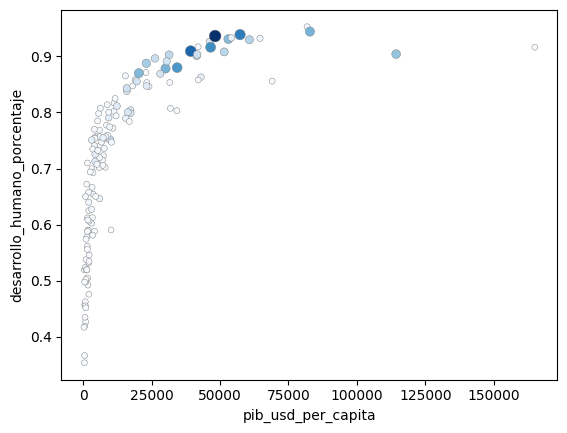

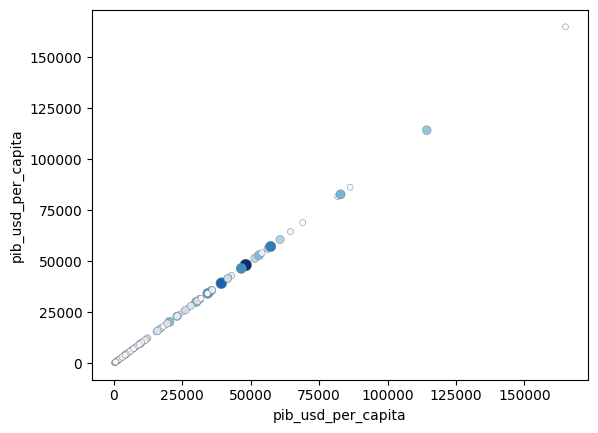

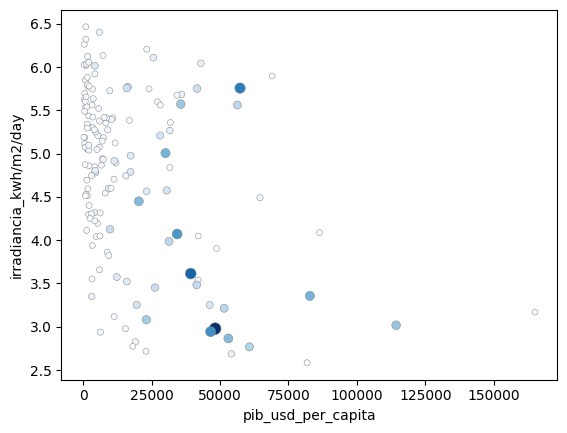

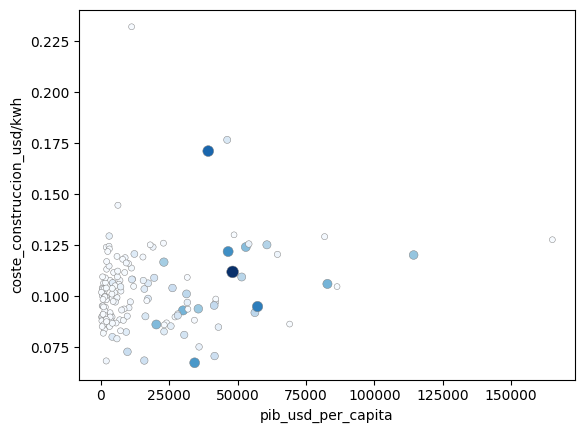

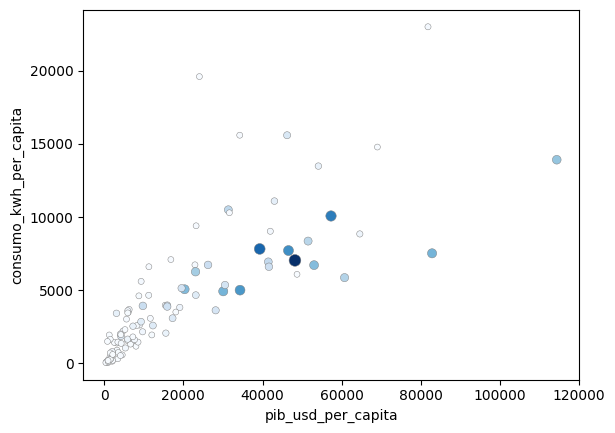

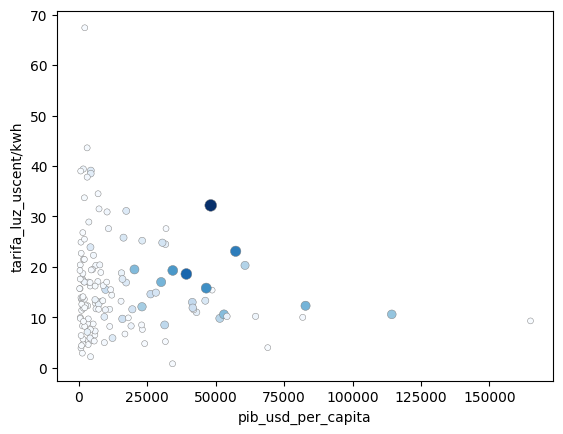

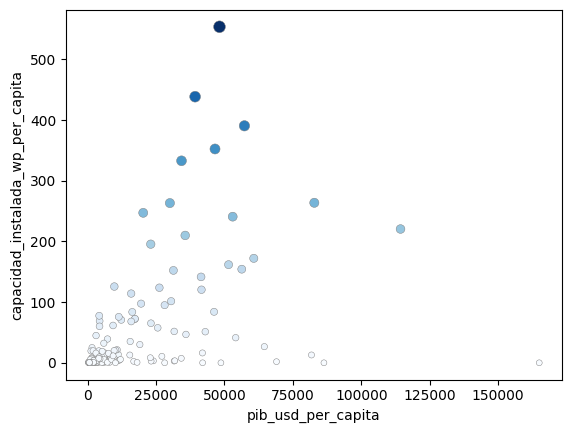

In [2877]:
dispersion_4_var(train_set,'pib_usd_per_capita', 'capacidad_instalada_wp_per_capita', 'capacidad_instalada_wp_per_capita' )

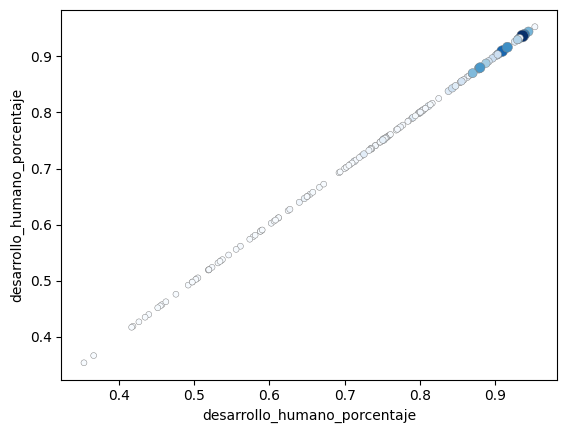

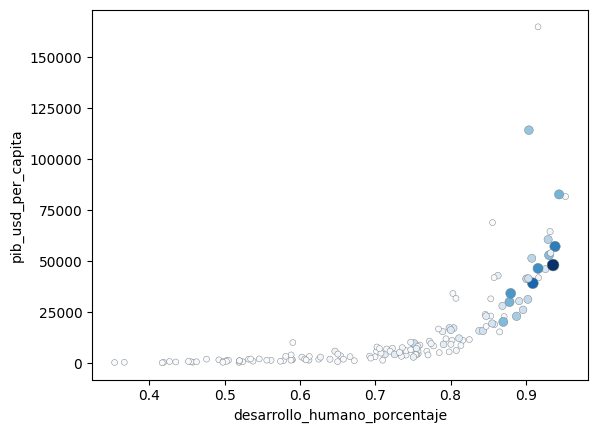

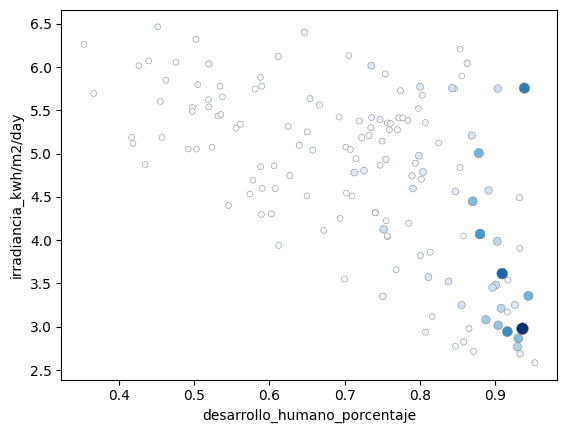

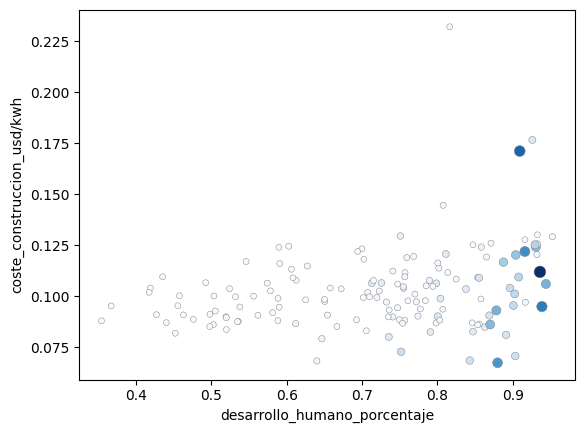

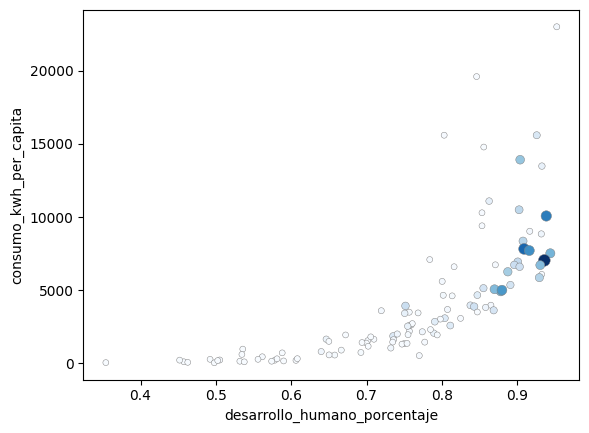

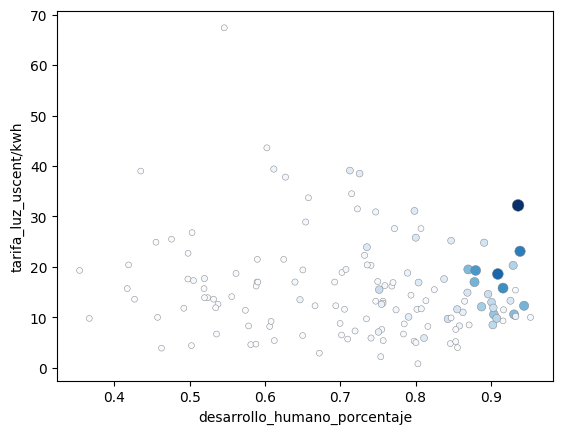

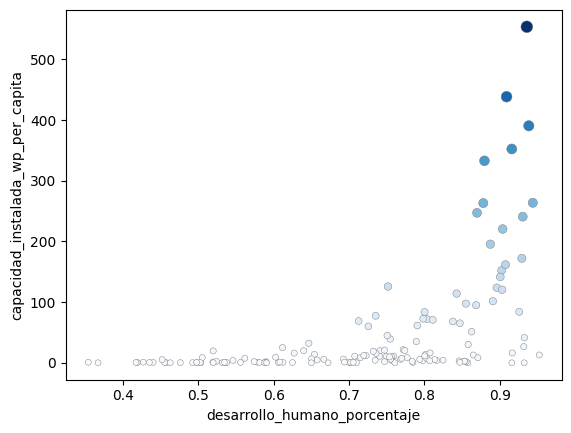

In [2878]:
dispersion_4_var(train_set,'desarrollo_humano_porcentaje', 'capacidad_instalada_wp_per_capita', 'capacidad_instalada_wp_per_capita' )

## 7. CONCLUSIÓN ANALISIS


La hipótesis inicial era la inversión en plantas solares debido a la alta irradiancia. Está hipótesis, es “falsa” a medias. 
Porque, además de la irradiancia depende de otros parámetros.

Parece que el parámetro más claro es el del desarrollo humano. Si tuvieramos un missing no podriamos calcular el modelo?
Separar en dos modelos: desarrollo <> 0.85. (Según estudio mini EDA)

Comprobación de separación de dos modelos con Kmeans.

Es importante separar el modelo en dos porque tenemos los datos desbalanceados.


## 8. ESTUDIO MACHINE LEARNING

1. Rellenar missing y estandarizar.
2. Kmeans para hacer dos modelos.
3. Predición numérica.

In [2879]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 8.1. TODAS LAS FEATURES + MISSINGS + CLUSTERING + MODELOS

#### 8.1.1. MISSINGS & ESTANDARIZAR

In [2880]:

# Pipeline 1: Imputación y Escalado
pipeline_numeric = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Missings con la media
    ('scaler', MinMaxScaler())                  # Normalización
])


#TRAIN

# Aplicar el primer pipeline (preprocesamiento)
X_train_1 = pipeline_numeric.fit_transform(X_train)
X_train_1_df = pd.DataFrame(X_train_1, columns=X_train.columns, index=X_train.index)


#TEST

#Comprobar con X test
#Transformamos los datos como el Train 
X_test_1= pipeline_numeric.transform(X_test)
X_test_1_df = pd.DataFrame(X_test_1, columns=X_test.columns, index=X_test.index)


#### 8.1.2. CLUSTERING

In [2881]:

# Pipeline 2: PC & Kmeans
pipeline_cluster = Pipeline([
    ('pca', PCA()),              
    ('kmeans', KMeans(random_state=42))                           # Se aplicará un GridSearch
])

# Definir el espacio de búsqueda de hiperparámetros para KMeans
param_grid_cluster = {
    'kmeans__n_clusters': [1],  
    'kmeans__init': ['k-means++', 'random'],  # Método de inicialización
    'kmeans__max_iter': [300, 500]           # Número máximo de iteraciones
}

# Definir GridSearchCV
grid_search = GridSearchCV(pipeline_cluster, param_grid_cluster, cv=5)

# Entrenar GridSearchCV aplicaco al pipeline
grid_search.fit(X_train_1_df)

# Parametros y metricas
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score de validación:", grid_search.best_score_, "\n")

#Elegir el mejor modelo
best_pipeline = grid_search.best_estimator_

#Metricas de la validacion cruzada con el mejor pipe
scores = cross_val_score(best_pipeline, X_train_1_df, y_train, cv=5)
print("Puntajes de validación cruzada:", scores)
print("Puntaje promedio de validación cruzada:", scores.mean, "\n")




# Predecimos las etiquetas aplicanco el pipeline
#TRAIN 
kmeans_labels_train = best_pipeline.predict(X_train_1_df)
X_train_1_cluster = X_train_1_df.copy()
X_train_1_cluster['Cluster'] = kmeans_labels_train

# #TEST
kmeans_labels_test = best_pipeline.predict(X_test_1_df)
X_test_1_cluster = X_test_1_df.copy()
X_test_1_cluster['Cluster'] = kmeans_labels_test




Mejores parámetros: {'kmeans__init': 'k-means++', 'kmeans__max_iter': 300, 'kmeans__n_clusters': 1}
Mejor score de validación: -6.42132165829158 

Puntajes de validación cruzada: [-5.91590408 -7.80607258 -4.28277788 -7.90420044 -6.19765331]
Puntaje promedio de validación cruzada: <built-in method mean of numpy.ndarray object at 0x00000201BEBDB990> 



In [2882]:
# Tarda mucho en ejecutarse
#  sns.pairplot(graficar_cluster)

In [2883]:
train_set["Cluster"] = kmeans_labels_train

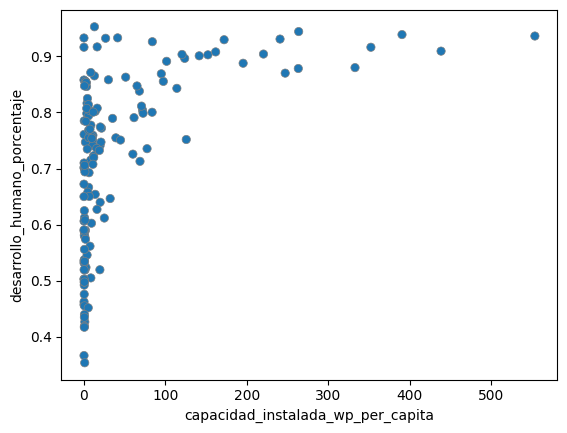

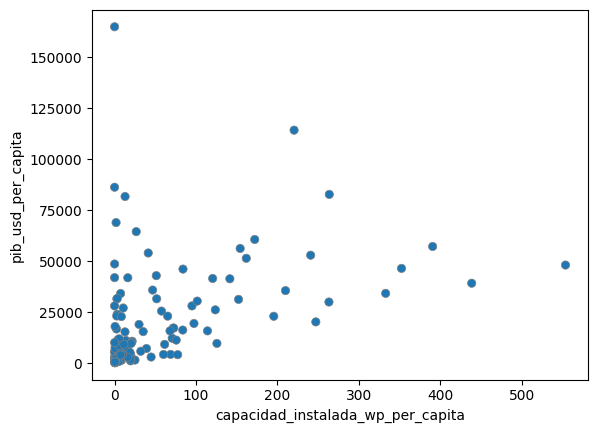

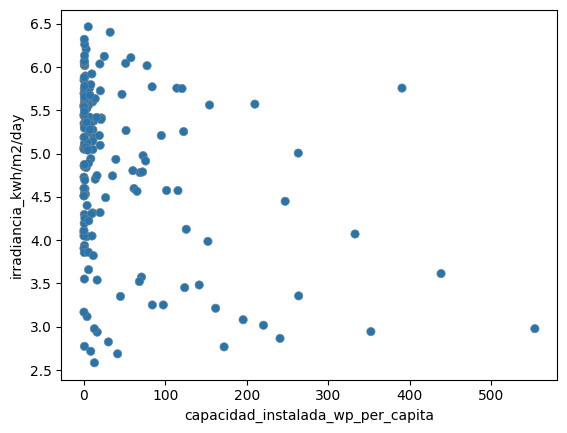

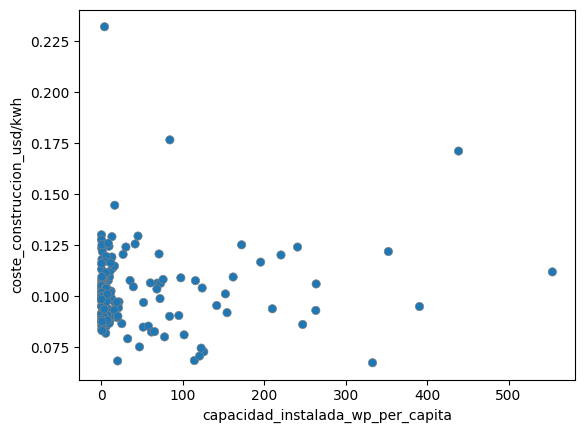

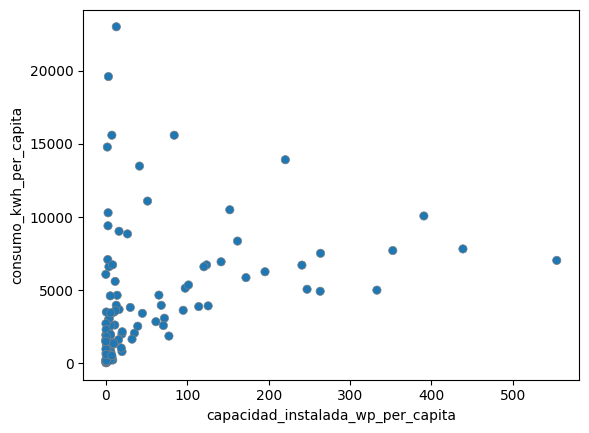

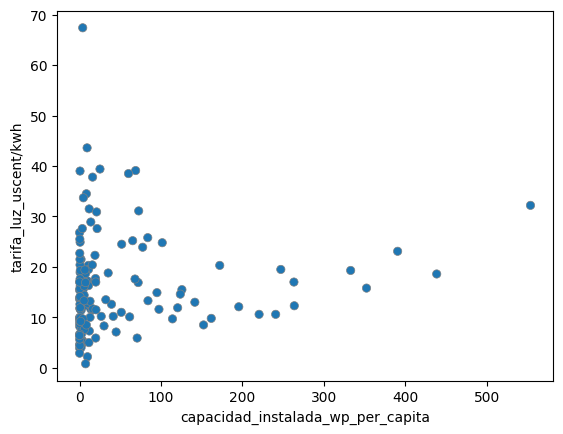

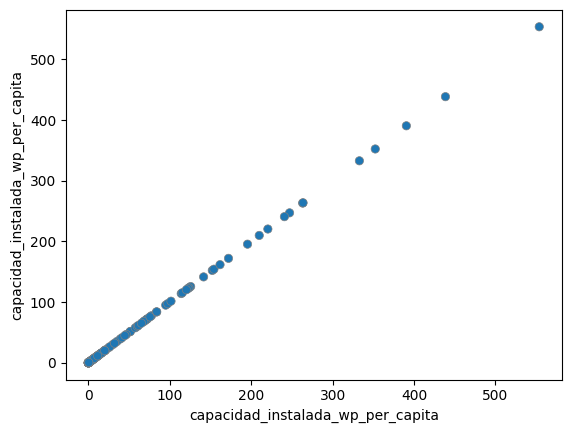

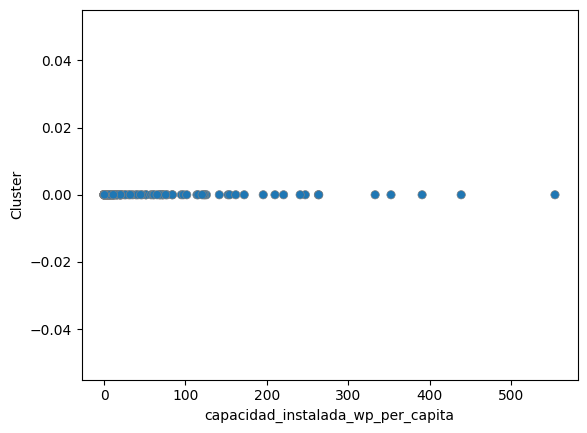

In [2884]:
for y1 in train_set.columns:
    plt.figure()  # Crea una nueva figura
    sns.scatterplot(x='capacidad_instalada_wp_per_capita',
                    y=y1,
                    hue='Cluster',
                    palette= "tab10",
                    data=train_set,
                    edgecolor='grey',
                    legend=False)  # Esto quita la leyenda)
    # Mostrar todas las gráficas

#### 8.1.3. MODELADO SUPERVISADO

In [2885]:
def dispersion_pred_real(y_train, y_pred, color_dim=None):
    """
    Grafica la relación entre valores reales y predicciones, con una dimensión adicional representada por el color.

    Parámetros:
    - y_train: Valores reales (array-like)
    - y_pred: Predicciones del modelo (array-like)
    - color_dim: Dimensión adicional para el color (array-like, opcional)
    """

    # Verificar que las dimensiones de y_train y y_pred sean compatibles
    if len(y_train) != len(y_pred):
        raise ValueError("Las longitudes de y_train y y_pred deben ser iguales.")
    
    # Si no se proporciona color_dim, no utilizar colores adicionales
    if color_dim is not None and len(color_dim) != len(y_train):
        raise ValueError("La longitud de color_dim debe ser igual a la de y_train y y_pred.")


    #gRAFICO dispersión de puntos 
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        x= y_train, 
        y = y_pred, 
        c=color_dim,  
        cmap='viridis',  
        alpha=0.8, 
        edgecolor='k'
    )
    #Linea de referencia train - train
    plt.plot(
        [y_train.min(), y_train.max()], 
        [y_train.min(), y_train.max()], 
        color='red', 
        linestyle='--', 
        linewidth=1.5
    )  # Línea de referencia
    plt.title('Predicciones vs Valores Reales (Color: Cluster)')
    plt.xlabel('Valores Reales (y_train)')
    plt.ylabel('Predicciones (y_pred)')
    plt.colorbar(scatter, label='Color :Clusters')  # Barra de colores
    plt.grid(True)
    plt.show()

In [2886]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
import pandas as pd

modelos = {
    "Regresión Lineal": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Árbol de Decisión": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR (RBF)": SVR(kernel="rbf", C=1.0),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, silent=True, random_state=42)
}


#TRAIN
resultados = []
y_pred_list = []

for nombre, modelo in modelos.items():
    # Entrenar modelo
    modelo.fit(X_train_1_cluster, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = modelo.predict(X_train_1_cluster)
    
    # Calcular métricas
    rmse = mean_squared_error(y_train, y_pred, squared=False)
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    
    # Guardar resultados
    resultados.append({
        "Modelo": nombre,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

    #Guardar y_pred
    y_pred_list.append({
        "Modelo": nombre,
        "Prediccion": y_pred
    })

# Paso 4: Visualizar resultados
df_resultados = pd.DataFrame(resultados)
df_resultados.sort_values(by=["R2"], ascending=False)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: '

,Modelo,RMSE,MAE,R2
10,XGBoost,0.036158,0.021713,1.000000
6,Gradient Boosting,12.876965,8.422464,0.978761
11,CatBoost,18.776637,12.908672,0.954841
4,Árbol de Decisión,22.662417,11.828931,0.934216
5,Random Forest,24.069955,13.113724,0.925791
8,KNN Regressor,55.962329,30.694305,0.598857
9,MLP Regressor,72.467114,42.787334,0.327350
0,Regresión Lineal,72.471580,45.959355,0.327267
2,Lasso,72.496072,45.872843,0.326812
1,Ridge,73.016117,45.653387,0.317119


Regresión Lineal


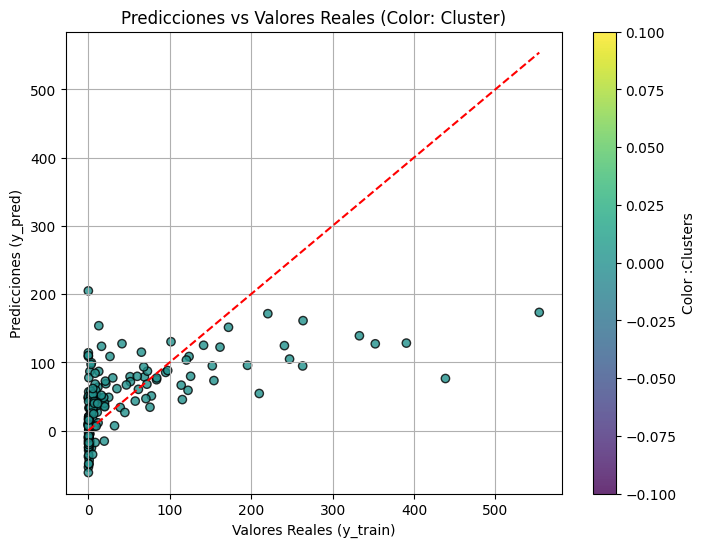

Ridge


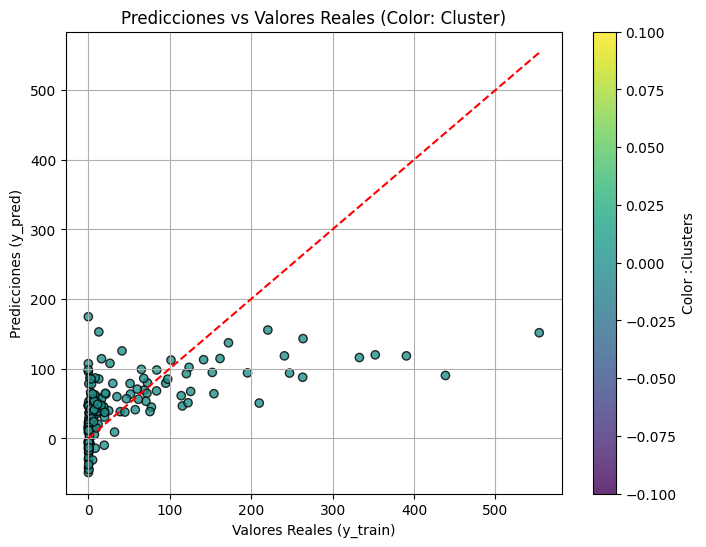

Lasso


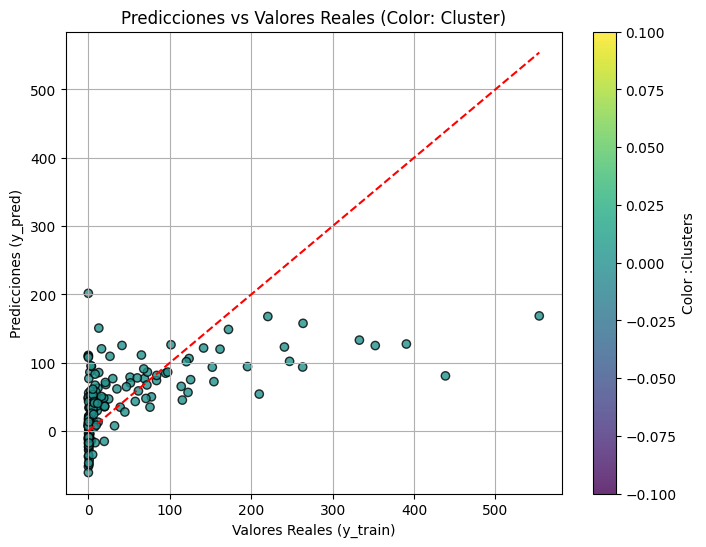

ElasticNet


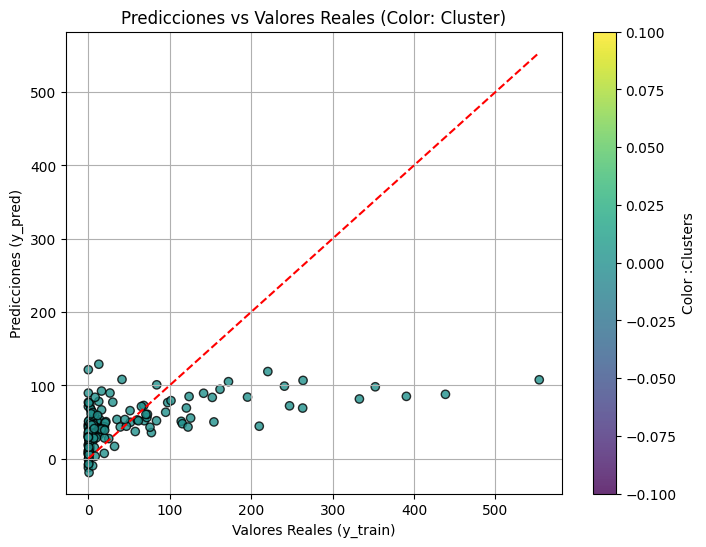

Árbol de Decisión


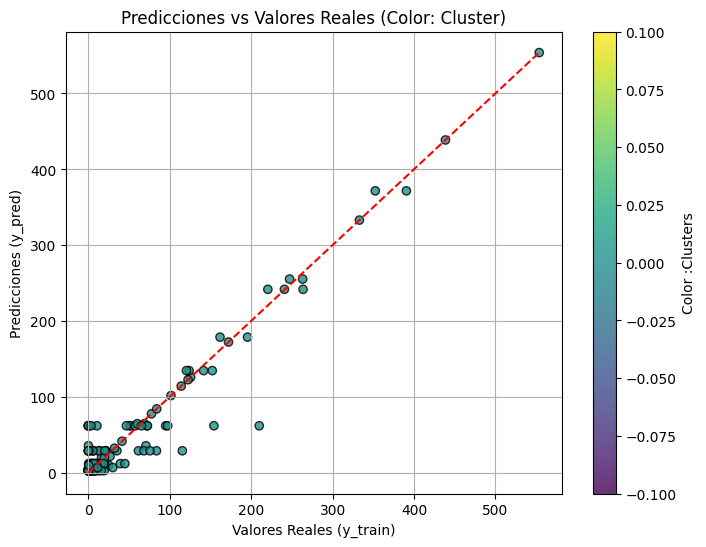

Random Forest


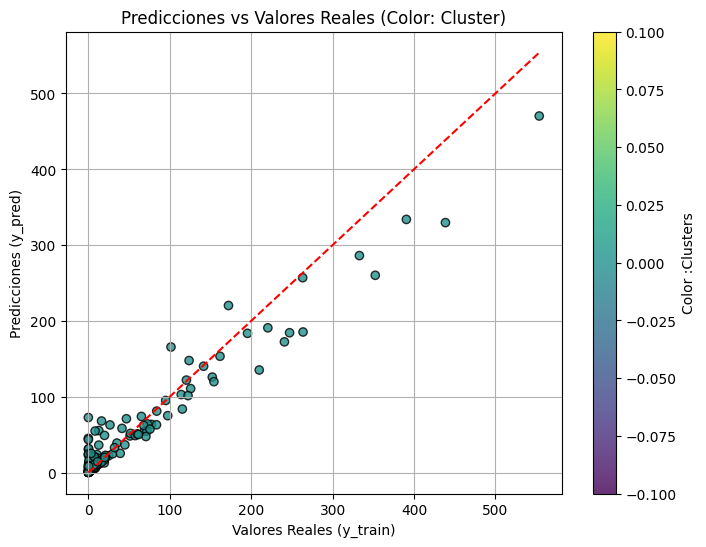

Gradient Boosting


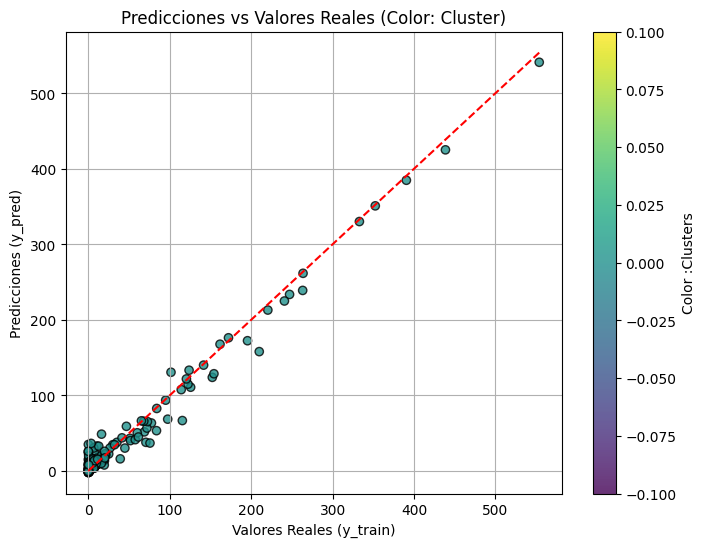

SVR (RBF)


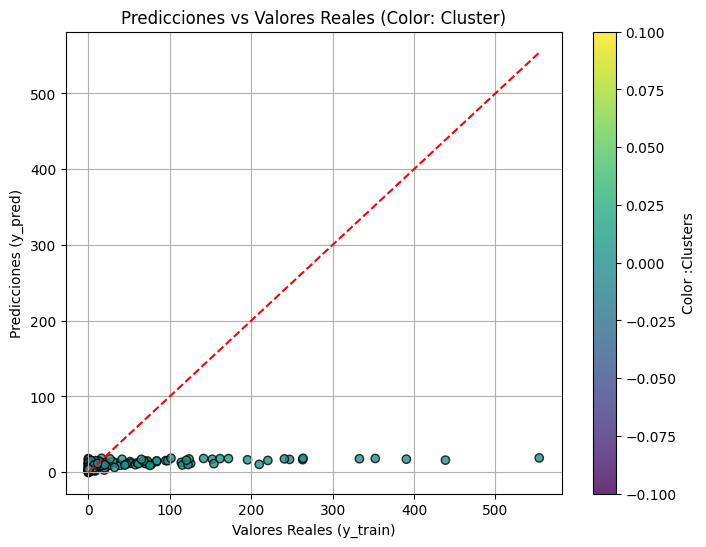

KNN Regressor


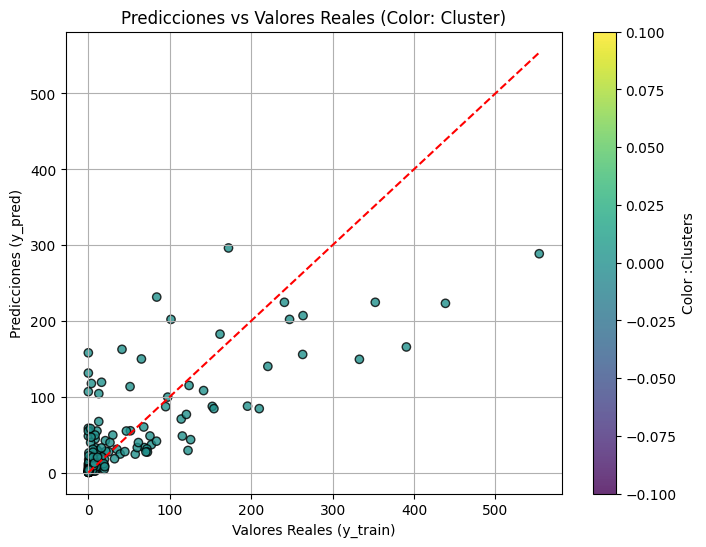

MLP Regressor


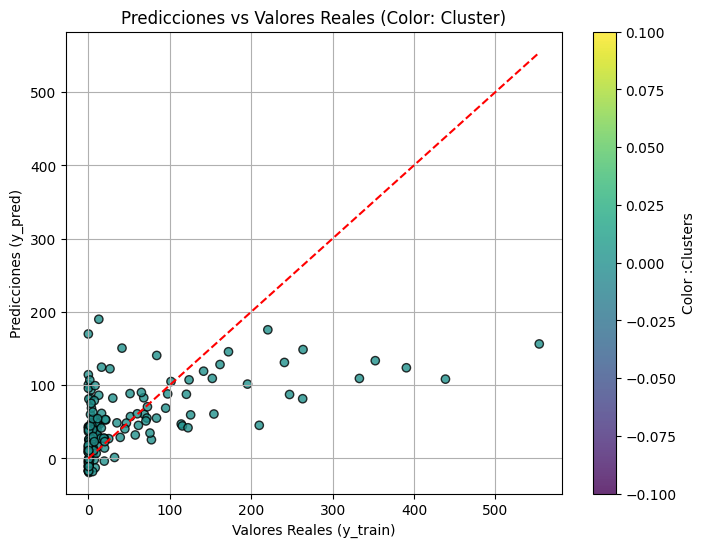

XGBoost


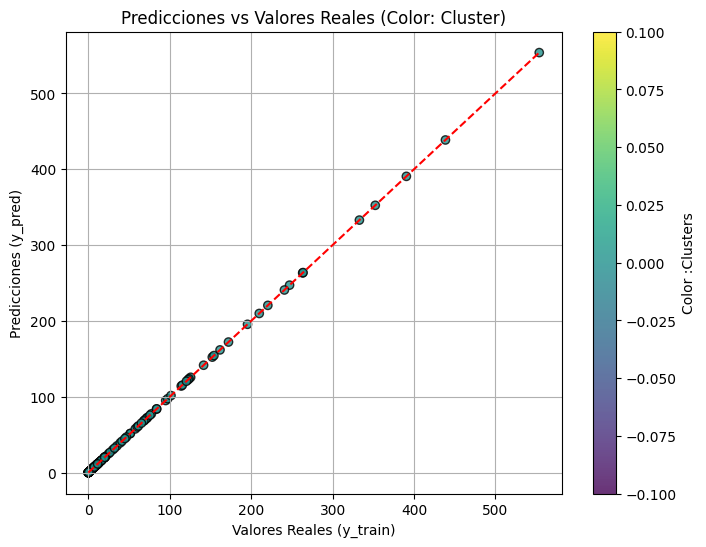

CatBoost


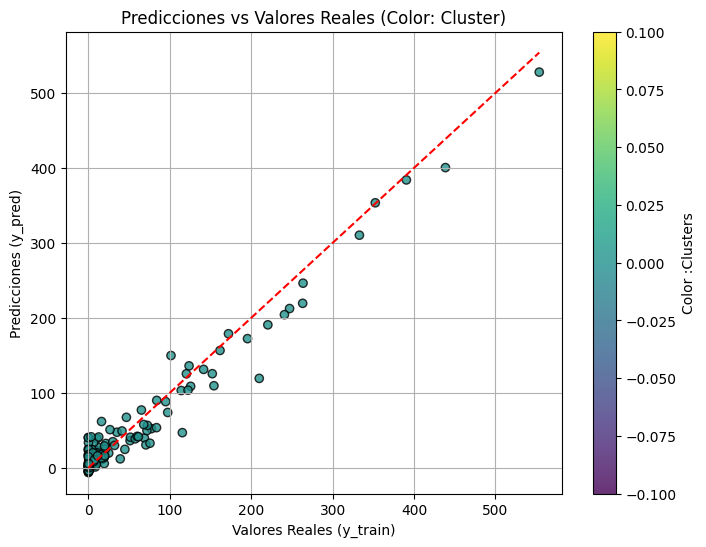

In [2887]:
for i, predition in enumerate(y_pred_list):
    print (predition["Modelo"])
    dispersion_pred_real(y_train,  predition["Prediccion"], color_dim=X_train_1_cluster["Cluster"])
#     #NO hay diferencia entre usar el cluster o no.

In [2888]:
#QUITAR OUTLAYERS DE CAPACIDAD INSTALADA PARA ENTRENAR
#SEPARAR LOS MODELOS CLUSTERING Y PREDECIR CON DIFERENTES ENTRENAMIENTOSV

In [2889]:
#TEST


# Lista para guardar los resultados y predicciones
resultados = []
y_pred_list = []

# Entrenar y evaluar cada modelo
for nombre, modelo in modelos.items():
    # Entrenar el modelo con el conjunto de entrenamiento
    modelo.fit(X_train_1_cluster, y_train)
    
    # Predecir sobre el conjunto de prueba (X_test)
    y_pred = modelo.predict(X_test_1_cluster)
    
    # Calcular métricas en el conjunto de prueba
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar los resultados de las métricas
    resultados.append({
        "Modelo": nombre,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

    # Guardar las predicciones
    y_pred_list.append({
        "Modelo": nombre,
        "Prediccion": y_pred
    })

# Convertir los resultados a un DataFrame y ordenar por R2
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by="R2", ascending=False)

# Mostrar los resultados ordenados
print(df_resultados)


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: '

               Modelo       RMSE        MAE        R2
11           CatBoost  38.820698  21.983875  0.302417
3          ElasticNet  40.326812  30.896642  0.247239
9       MLP Regressor  41.040039  28.879215  0.220377
1               Ridge  43.352679  34.202883  0.130036
2               Lasso  45.971613  36.224643  0.021752
0    Regresión Lineal  46.421755  36.466337  0.002501
7           SVR (RBF)  47.442616  23.051004 -0.041853
4   Árbol de Decisión  51.623658  24.851228 -0.233579
6   Gradient Boosting  52.673392  26.876922 -0.284257
5       Random Forest  55.303735  28.594778 -0.415723
8       KNN Regressor  58.492227  26.336763 -0.583674
10            XGBoost  61.146353  29.891488 -0.730655


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [2890]:
# for i, predition in enumerate(y_pred_list):
#     print (predition["Modelo"])
#     dispersion_pred_real(predition["Prediccion"], y_test, color_dim=X_test_1_cluster["Cluster"])
#     #NO hay diferencia entre usar el cluster o no.

### 8.2. UN MODELADO DIFERENTE POR CADA CLUSTERS

In [2891]:
### 8.1. MISSINGS & ESTANDARIZAR
#Recuperamos los datos ya tratados:
X_train_1_df
X_test_1_df

,desarrollo_humano_porcentaje,pib_usd_per_capita,irradiancia_kwh/m2/day,coste_construccion_usd/kwh,consumo_kwh_per_capita,tarifa_luz_uscent/kwh
pais,,,,,,
Benin,0.268445,0.003803,0.705937,0.207398,0.002664,0.282282
Antigua and Barbuda,0.711011,0.100690,0.816384,0.131595,0.176579,0.644144
Maldives,0.606313,0.060383,0.774934,0.172832,0.176579,0.662162
Honduras,0.439007,0.013398,0.664641,0.198302,0.025294,0.246246
Georgia,0.711490,0.024699,0.293806,0.289266,0.115628,0.085586
Curaçao (Neth.),0.609197,0.116430,0.870501,0.124924,0.207249,0.224858
Philippines,0.576356,0.017161,0.553087,0.249848,0.028627,0.234234
Togo,0.249400,0.002406,0.678286,0.217101,0.005035,0.243243
South Africa,0.576519,0.037017,0.784203,0.286841,0.181128,0.210210


In [2892]:

### 8.2. CLUSTER
#Recuperamos los datos
X_train_1_cluster
X_test_1_cluster


,desarrollo_humano_porcentaje,pib_usd_per_capita,irradiancia_kwh/m2/day,coste_construccion_usd/kwh,consumo_kwh_per_capita,tarifa_luz_uscent/kwh,Cluster
pais,,,,,,,
Benin,0.268445,0.003803,0.705937,0.207398,0.002664,0.282282,0
Antigua and Barbuda,0.711011,0.100690,0.816384,0.131595,0.176579,0.644144,0
Maldives,0.606313,0.060383,0.774934,0.172832,0.176579,0.662162,0
Honduras,0.439007,0.013398,0.664641,0.198302,0.025294,0.246246,0
Georgia,0.711490,0.024699,0.293806,0.289266,0.115628,0.085586,0
Curaçao (Neth.),0.609197,0.116430,0.870501,0.124924,0.207249,0.224858,0
Philippines,0.576356,0.017161,0.553087,0.249848,0.028627,0.234234,0
Togo,0.249400,0.002406,0.678286,0.217101,0.005035,0.243243,0
South Africa,0.576519,0.037017,0.784203,0.286841,0.181128,0.210210,0


In [2893]:
### 8.3. MODELAR PARA LOS CLUSTERS

modelos = {
    "Regresión Lineal": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Árbol de Decisión": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR (RBF)": SVR(kernel="rbf", C=1.0),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, silent=True, random_state=42)
}


#TRAIN
resultados = []
y_pred_list = []
 

# Filtrar por cada Cluster
for cluster in X_train_1_cluster['Cluster'].unique():

    # Filtrar el dataset para el cluster específico
    cluster_data = X_train_1_cluster[X_train_1_cluster['Cluster'] == cluster]


    # Separar características (sin la columna Cluster) y etiquetas
    X_train_1_cluster_filter = cluster_data.drop(columns=['Cluster'])
    y_train_1_cluster_filter = y_train[X_train_1_cluster['Cluster'] == cluster]
    

    #Aplicar un modelo para cada Cluster
    for nombre, modelo in modelos.items():
        # Entrenar modelo
        modelo.fit(X_train_1_cluster_filter, y_train_1_cluster_filter)
        
        # Predecir en el conjunto de prueba
        y_pred_train = modelo.predict(X_train_1_cluster_filter)
        
        # Calcular métricas
        rmse = mean_squared_error(y_train_1_cluster_filter, y_pred_train, squared=False)
        mae = mean_absolute_error(y_train_1_cluster_filter, y_pred_train)
        r2 = r2_score(y_train_1_cluster_filter, y_pred_train)
        
        # Guardar resultados
        resultados.append({
            "Cluster": cluster,
            "Modelo": nombre,
            "RMSE": rmse,
            "MAE": mae,
            "R2": r2
        })

        #Guardar y_pred
        y_pred_list.append({
            "Cluster": cluster,
            "Modelo": nombre,
            "Prediccion": y_pred_train
        })

# Convertir los resultados a DataFrame
df_resultados = pd.DataFrame(resultados)
df_resultados.sort_values(by = ["R2"], ascending = False)


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: '

,Cluster,Modelo,RMSE,MAE,R2
10,0,XGBoost,0.036158,0.021713,1.000000
6,0,Gradient Boosting,12.876965,8.422464,0.978761
11,0,CatBoost,18.776637,12.908672,0.954841
4,0,Árbol de Decisión,22.662417,11.828931,0.934216
5,0,Random Forest,24.028761,13.163261,0.926045
8,0,KNN Regressor,55.962329,30.694305,0.598857
0,0,Regresión Lineal,72.471580,45.959355,0.327267
2,0,Lasso,72.496072,45.872843,0.326812
9,0,MLP Regressor,72.961785,43.423251,0.318135
1,0,Ridge,73.016117,45.653387,0.317119


In [2894]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



#TEST
# Inicializar listas para almacenar los resultados de test
resultados_test = []
y_pred_test_list = []

# Evaluar cada cluster por separado
for cluster in X_test_1_cluster['Cluster'].unique():
    # Filtrar el dataset de prueba para el cluster específico
    cluster_data_test = X_test_1_cluster[X_test_1_cluster['Cluster'] == cluster]
    
    # Separar características (sin la columna Cluster) y etiquetas
    X_test_1_cluster_filter = cluster_data_test.drop(columns=['Cluster'])
    y_test_1_cluster_filter = y_test[X_test_1_cluster['Cluster'] == cluster]
    
    # Aplicar cada modelo al cluster
    for nombre, modelo in modelos.items():
        # Predecir en el conjunto de prueba
        y_pred_test = modelo.predict(X_test_1_cluster_filter)
        
        # Calcular métricas
        rmse_test = mean_squared_error(y_test_1_cluster_filter, y_pred_test, squared=False)
        mae_test = mean_absolute_error(y_test_1_cluster_filter, y_pred_test)
        r2_test = r2_score(y_test_1_cluster_filter, y_pred_test)
        
        # Guardar resultados de test
        resultados_test.append({
            "Cluster": cluster,
            "Modelo": nombre,
            "RMSE_Test": rmse_test,
            "MAE_Test": mae_test,
            "R2_Test": r2_test
        })

        # Guardar predicciones de test
        y_pred_test_list.append({
            "Cluster": cluster,
            "Modelo": nombre,
            "Prediccion_Test": y_pred_test
        })

# Convertir los resultados de test a DataFrame
df_resultados_test = pd.DataFrame(resultados_test)

# Ordenar por R2 en el conjunto de prueba
df_resultados_test = df_resultados_test.sort_values(by=["R2_Test"], ascending=False)

# Mostrar los resultados
print(df_resultados_test)


    Cluster             Modelo  RMSE_Test   MAE_Test   R2_Test
11        0           CatBoost  38.820698  21.983875  0.302417
3         0         ElasticNet  40.326812  30.896642  0.247239
9         0      MLP Regressor  41.034184  29.357613  0.220599
1         0              Ridge  43.352679  34.202883  0.130036
2         0              Lasso  45.971613  36.224643  0.021752
0         0   Regresión Lineal  46.421755  36.466337  0.002501
7         0          SVR (RBF)  47.377798  22.955239 -0.039009
5         0      Random Forest  52.187403  27.253206 -0.260668
6         0  Gradient Boosting  54.917240  27.324459 -0.396004
8         0      KNN Regressor  58.492227  26.336763 -0.583674
4         0  Árbol de Decisión  59.782669  27.684057 -0.654322
10        0            XGBoost  61.146353  29.891488 -0.730655


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: '

### 8.3. MODELADO SIN CLUSTERING, CON TODAS LAS FEATURES

8.3.1. QUITAR OUTLAYERS PARA ENTRENAR

8.3.2. ESTANDARIZACIÓN Y MISSINGS

In [2895]:
X_train.columns

Index(['desarrollo_humano_porcentaje', 'pib_usd_per_capita',
       'irradiancia_kwh/m2/day', 'coste_construccion_usd/kwh',
       'consumo_kwh_per_capita', 'tarifa_luz_uscent/kwh'],
      dtype='object')

In [2896]:

# Pipeline 1: Imputación y Escalado

from sklearn.impute import KNNImputer

pipeline_numeric = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    # ('imputer', SimpleImputer(strategy= "most_frequent")),  # Missings con la moda
    ('scaler', MinMaxScaler())                  # Normalización
])


# from imblearn.under_sampling import RandomUnderSampler

# undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# # Ajustar el undersampler al conjunto de entrenamiento
# X_train, y_train = undersampler.fit_resample(X_train, y_train)


#Editar X_train
featur = [ 'desarrollo_humano_porcentaje','pib_usd_per_capita',
       'irradiancia_kwh/m2/day', 'coste_construccion_usd/kwh']
X_train = X_train[featur]
X_test = X_test[featur]

#TRAIN
# Aplicar el primer pipeline (preprocesamiento)
X_train_3 = pipeline_numeric.fit_transform(X_train)
X_train_3_df = pd.DataFrame(X_train_3, columns=X_train.columns, index=X_train.index)
# X_train_filtrado = X_train_3_df[X_train_3_df["pib_usd_per_capita"] <= 57000]


#TEST
#Comprobar con X test
#Transformamos los datos como el Train 
X_test_3= pipeline_numeric.transform(X_test)
X_test_3_df = pd.DataFrame(X_test_3, columns=X_test.columns, index=X_test.index)


# y_train_filtrado = y_train[X_train_3_df["pib_usd_per_capita"] <= 57000]

8.3.3 MODELADO

In [2897]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
import pandas as pd

modelos = {
    "Regresión Lineal": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Árbol de Decisión": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR (RBF)": SVR(kernel="rbf", C=1.0),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, silent=True, random_state=42)
}


#TRAIN
resultados = []
y_pred_list = []

for nombre, modelo in modelos.items():
    # Entrenar modelo
    modelo.fit(X_train_3_df, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = modelo.predict(X_train_3_df)
    
    # Calcular métricas
    rmse = mean_squared_error(y_train, y_pred, squared=False)
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    
    # Guardar resultados
    resultados.append({
        "Modelo": nombre,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

    #Guardar y_pred
    y_pred_list.append({
        "Modelo": nombre,
        "Prediccion": y_pred
    })

# Paso 4: Visualizar resultados
df_resultados = pd.DataFrame(resultados)
df_resultados.sort_values(by=["R2"], ascending=False)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: '

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in versi

,Modelo,RMSE,MAE,R2
10,XGBoost,0.022867,0.016047,1.000000
6,Gradient Boosting,12.024570,8.430387,0.981480
11,CatBoost,22.451101,14.940048,0.935437
5,Random Forest,26.147065,13.713309,0.912430
4,Árbol de Decisión,26.662423,15.045052,0.908944
8,KNN Regressor,61.422847,33.446039,0.516755
0,Regresión Lineal,75.062861,45.396693,0.278298
2,Lasso,75.080969,45.415584,0.277950
1,Ridge,75.359913,46.099803,0.272575
9,MLP Regressor,75.387973,45.665411,0.272033


In [2898]:
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calcula el Mean Absolute Percentage Error (MAPE).
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


#NO ME APORTA VALOR PUESTO QUE MUCHOS VALORES SON SIMILARES A 0

In [2899]:
#TEST


# Lista para guardar los resultados y predicciones
resultados = []
y_pred_list = []

# Entrenar y evaluar cada modelo
for nombre, modelo in modelos.items():
    # Entrenar el modelo con el conjunto de entrenamiento
    modelo.fit(X_train_3_df, y_train)
    
    # Predecir sobre el conjunto de prueba (X_test)
    y_pred = modelo.predict(X_test_3_df)
    
    # Calcular métricas en el conjunto de prueba
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test,y_pred)
    
    # Guardar los resultados de las métricas
    resultados.append({
        "Modelo": nombre,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "MAPE": mape
    })

    # Guardar las predicciones
    y_pred_list.append({
        "Modelo": nombre,
        "Prediccion": y_pred
    })

# Convertir los resultados a un DataFrame y ordenar por R2
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by="R2", ascending=False)

# Mostrar los resultados ordenados
print(df_resultados)


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_14440\334380332.py:6: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_14440\334380332.py:6: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_14440\334380332.py:6: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_14440\334380332.py:6: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site

               Modelo       RMSE        MAE        R2  MAPE
11           CatBoost  31.437250  19.192088  0.542534   inf
4   Árbol de Decisión  38.639827  21.650436  0.308902   inf
5       Random Forest  39.086538  22.244291  0.292830   inf
6   Gradient Boosting  41.200984  23.137307  0.214250   inf
3          ElasticNet  41.622186  31.763811  0.198102   inf
9       MLP Regressor  42.806077  31.599518  0.151835   inf
1               Ridge  43.018579  33.617837  0.143393   inf
2               Lasso  43.764827  33.756513  0.113416   inf
0    Regresión Lineal  44.025113  33.813290  0.102839   inf
8       KNN Regressor  44.099476  25.515208  0.099806   inf
7           SVR (RBF)  47.493314  23.679763 -0.044081   inf
10            XGBoost  52.759319  29.759370 -0.288450   inf


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_14440\334380332.py:6: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


C:\Users\USER\AppData\Local\Temp\ipykernel_14440\4211269936.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(


Regresión Lineal


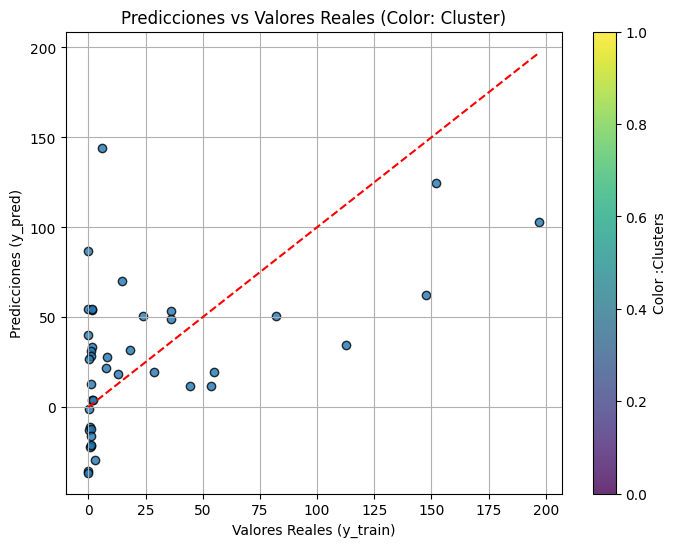

Ridge


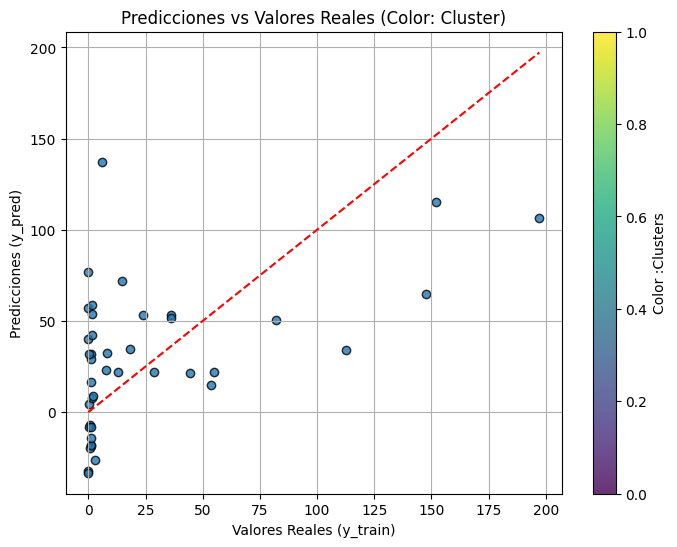

Lasso


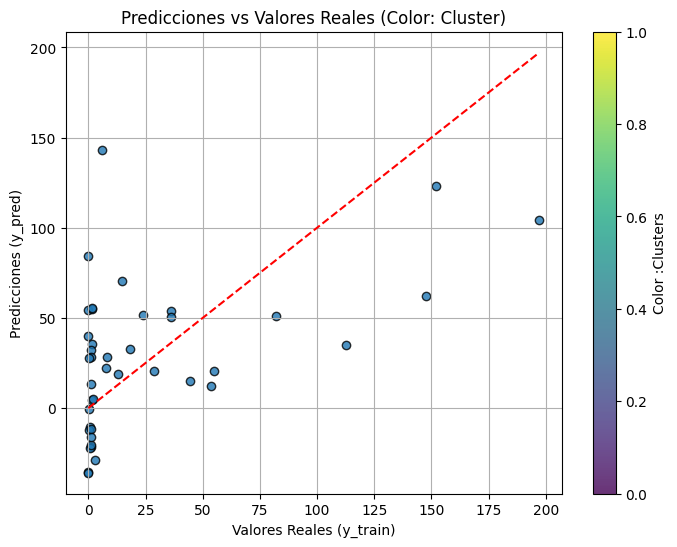

ElasticNet


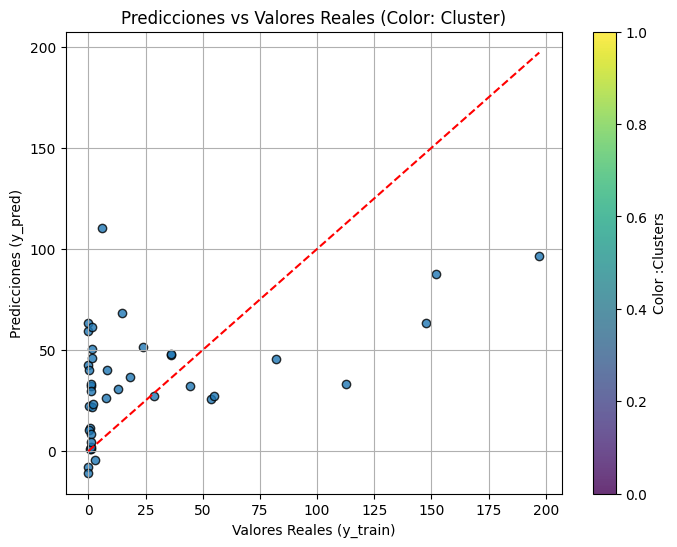

Árbol de Decisión


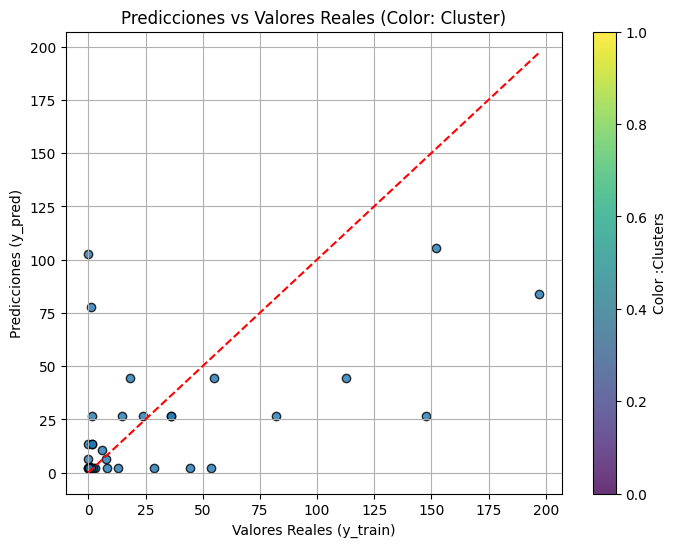

Random Forest


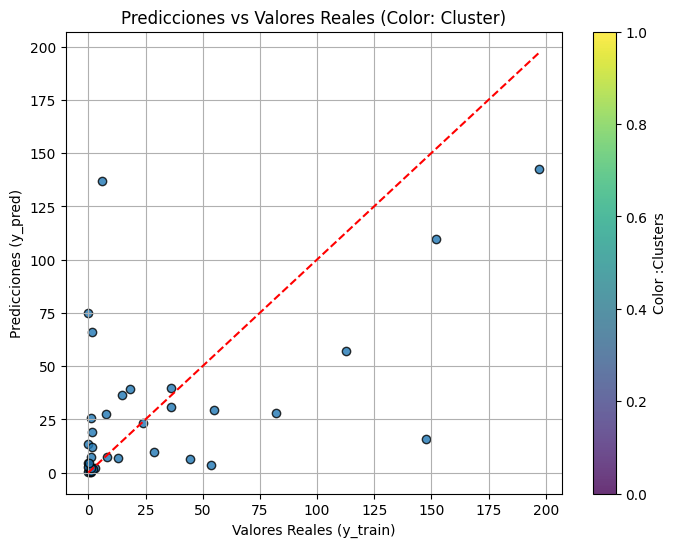

Gradient Boosting


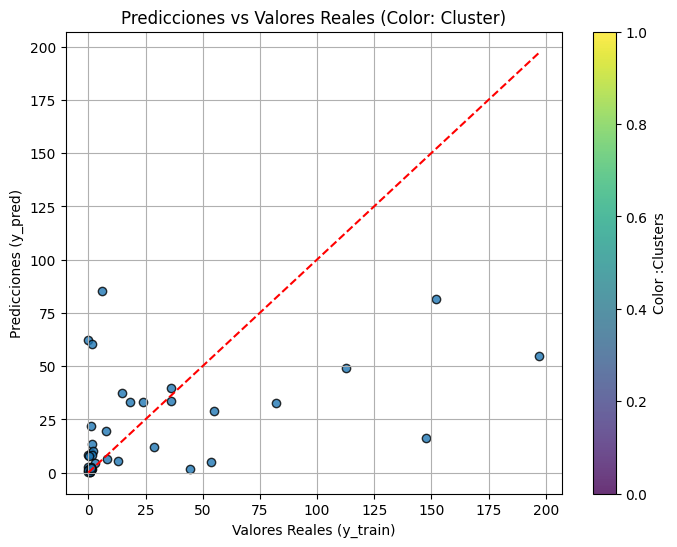

SVR (RBF)


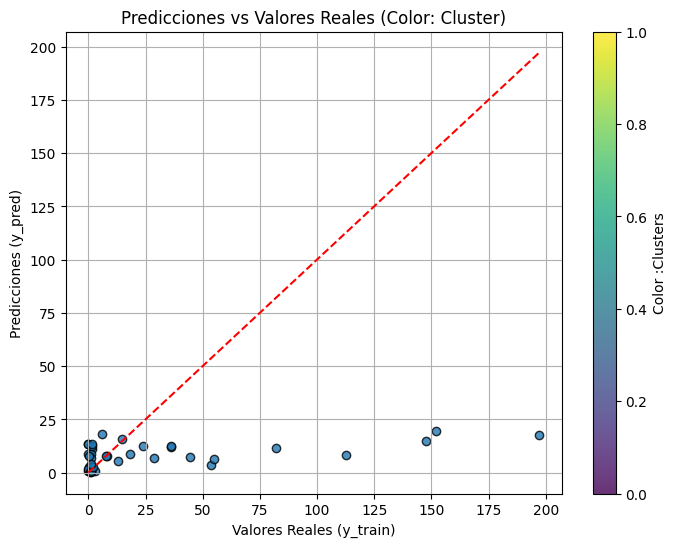

KNN Regressor


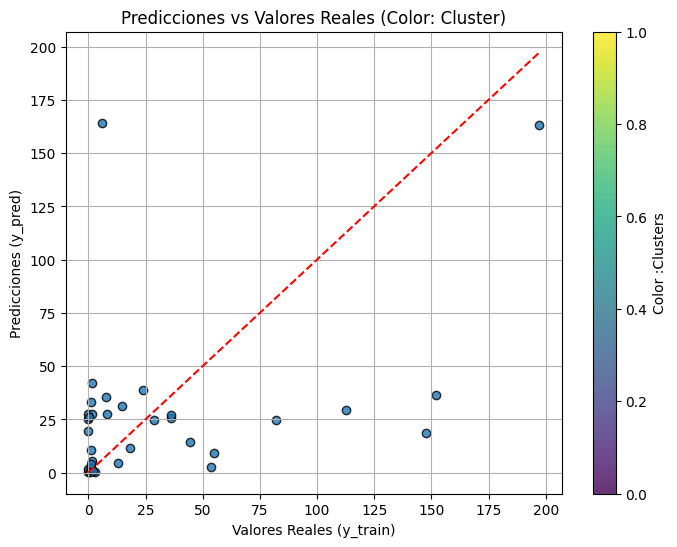

MLP Regressor


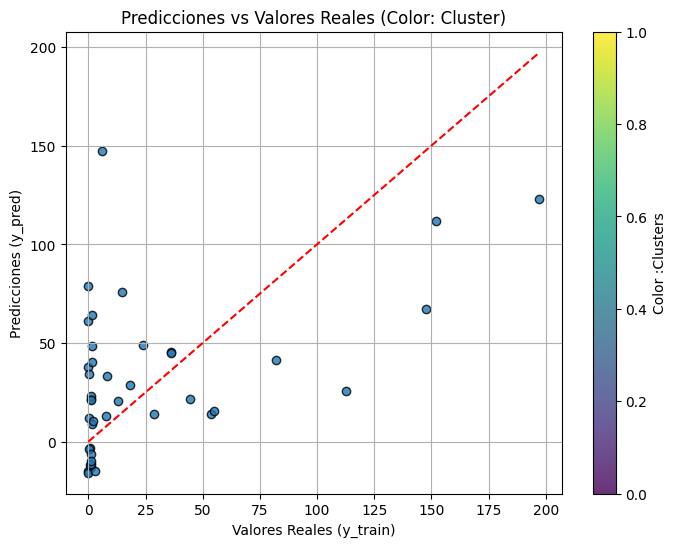

XGBoost


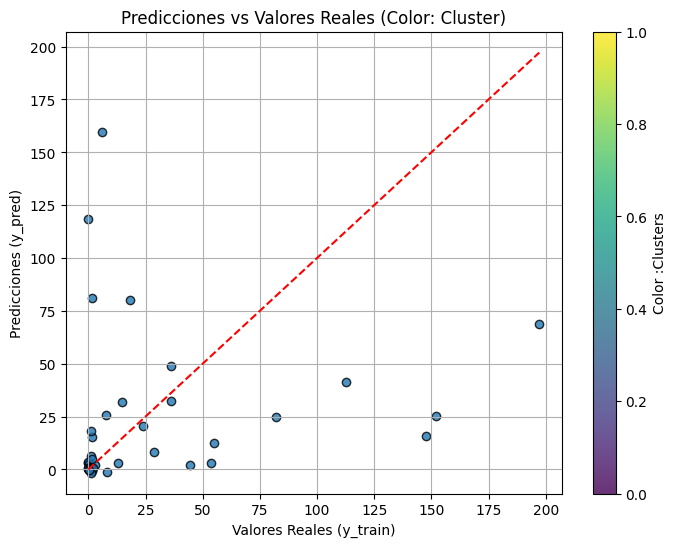

CatBoost


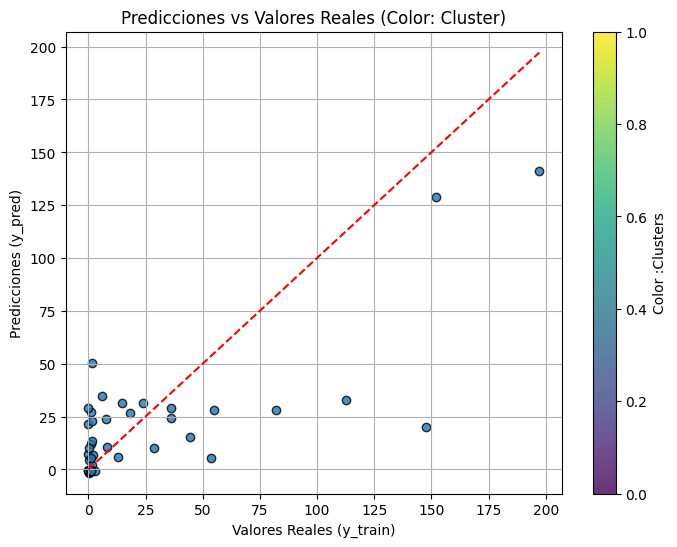

In [2900]:
for i, predition in enumerate(y_pred_list):
    print (predition["Modelo"])
    dispersion_pred_real(y_test, predition["Prediccion"] )
    #NO hay diferencia entre usar el cluster o no.

### 9. ELEGIMOS CATBOOST

9